## Modelling part 1: Reproducing the paper results

Expected results:
- SST (Sea Surface Temperature) (increase) influences hard corals negatively
- Photosynthetic active raditation (PAR) as well
- Wind speed helps cool down 
- UV radiance increase temperature
- Deep water helps coral from temperature 

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_data = pd.read_csv("../Data/merged_30_04.csv")
df_data.drop(columns = "id", inplace = True)

In [101]:
# Keep columns related to environment
col_env = ['year','pr_hard_coral', 'pr_algae','pr_soft_coral', 'pr_oth_invert', 'pr_other', 'country','geometry', 'wind_speed', 'Chlor', 'solar_rad', 'solar_rad_clear_sky', 'DHW', 'SST', 'par', 'elevation']
df_data_env = df_data[col_env]

### Distribution plots for numerical values depending on country

Text(0.5, 0.98, 'Distribution of environmental features by country')

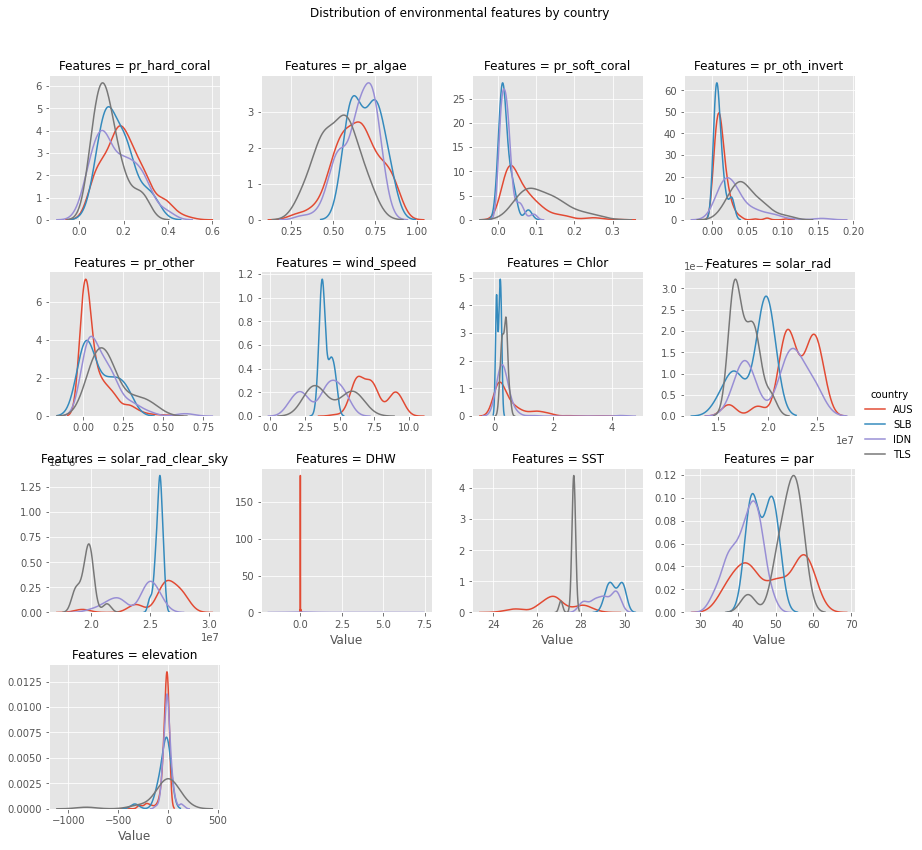

In [102]:
numeric_features= df_data_env.drop(columns = ['country', 'geometry','year'])
numeric_features = numeric_features.stack().reset_index().rename(columns = {"level_1":"Features",0:"Value"})
df_country =  pd.DataFrame(df_data_env["country"])
merged_num = pd.merge(df_country, numeric_features, left_index=True, right_on='level_0')
g = sns.FacetGrid(data =merged_num, col="Features",  hue = "country",col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "Value",  hist = False)
g.add_legend()
plt.subplots_adjust(top=0.9)
plt.suptitle("Distribution of environmental features by country")

Text(0.5, 0.98, 'Distribution of all features by Year')

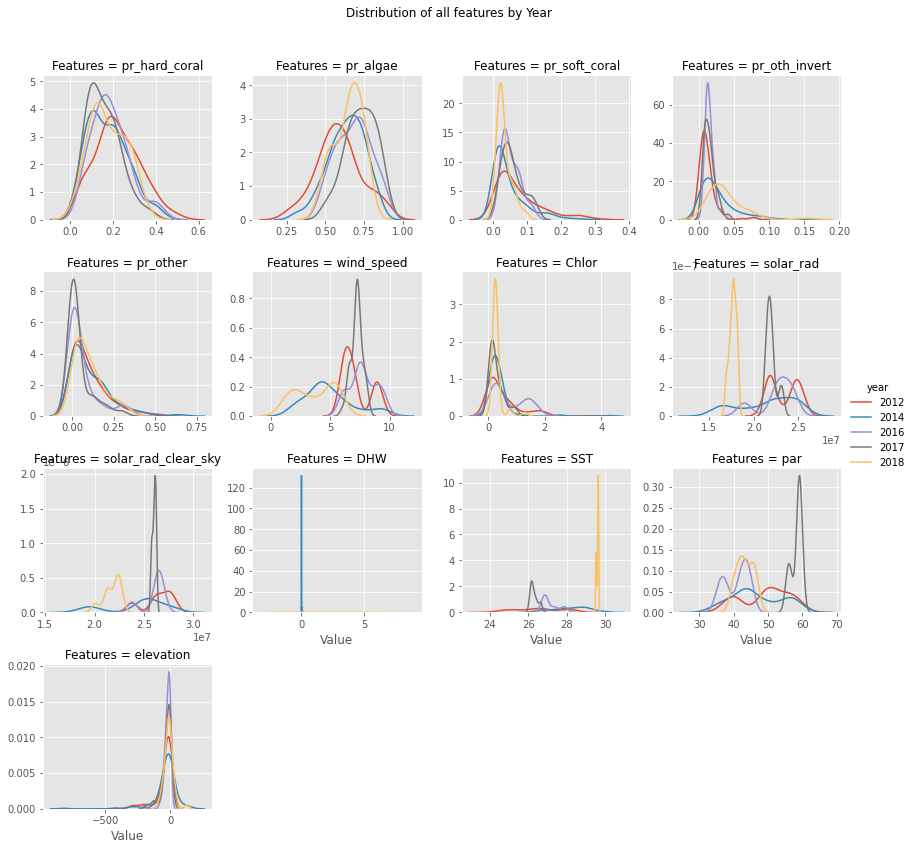

In [103]:
numeric_features= df_data_env.drop(columns = ['year','country', 'geometry'])
numeric_features = numeric_features.stack().reset_index().rename(columns = {"level_1":"Features",0:"Value"})
df_year=  pd.DataFrame(df_data["year"])
merged_num = pd.merge(df_year, numeric_features, left_index=True, right_on='level_0')
g = sns.FacetGrid(data =merged_num, col="Features",  hue = "year",col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "Value", hist = False)
g.add_legend()
plt.subplots_adjust(top=0.9)
plt.suptitle("Distribution of all features by Year")

### Correlation Matrix


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

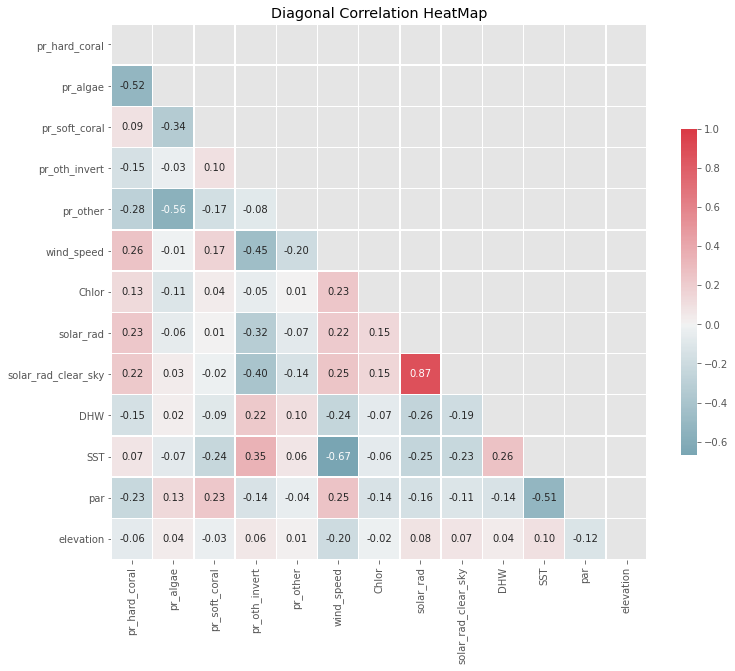

In [104]:
f, ax = plt.subplots(figsize=(12, 12))
corr = df_data_env.drop(columns = ['year','country', 'geometry']).corr()
 
# TO display diagonal matrix instead of full matrix.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
# Generate a custom diverging colormap.
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio.
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',\
square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
# plt.subplots_adjust(top=0.99)
plt.title("Diagonal Correlation HeatMap")

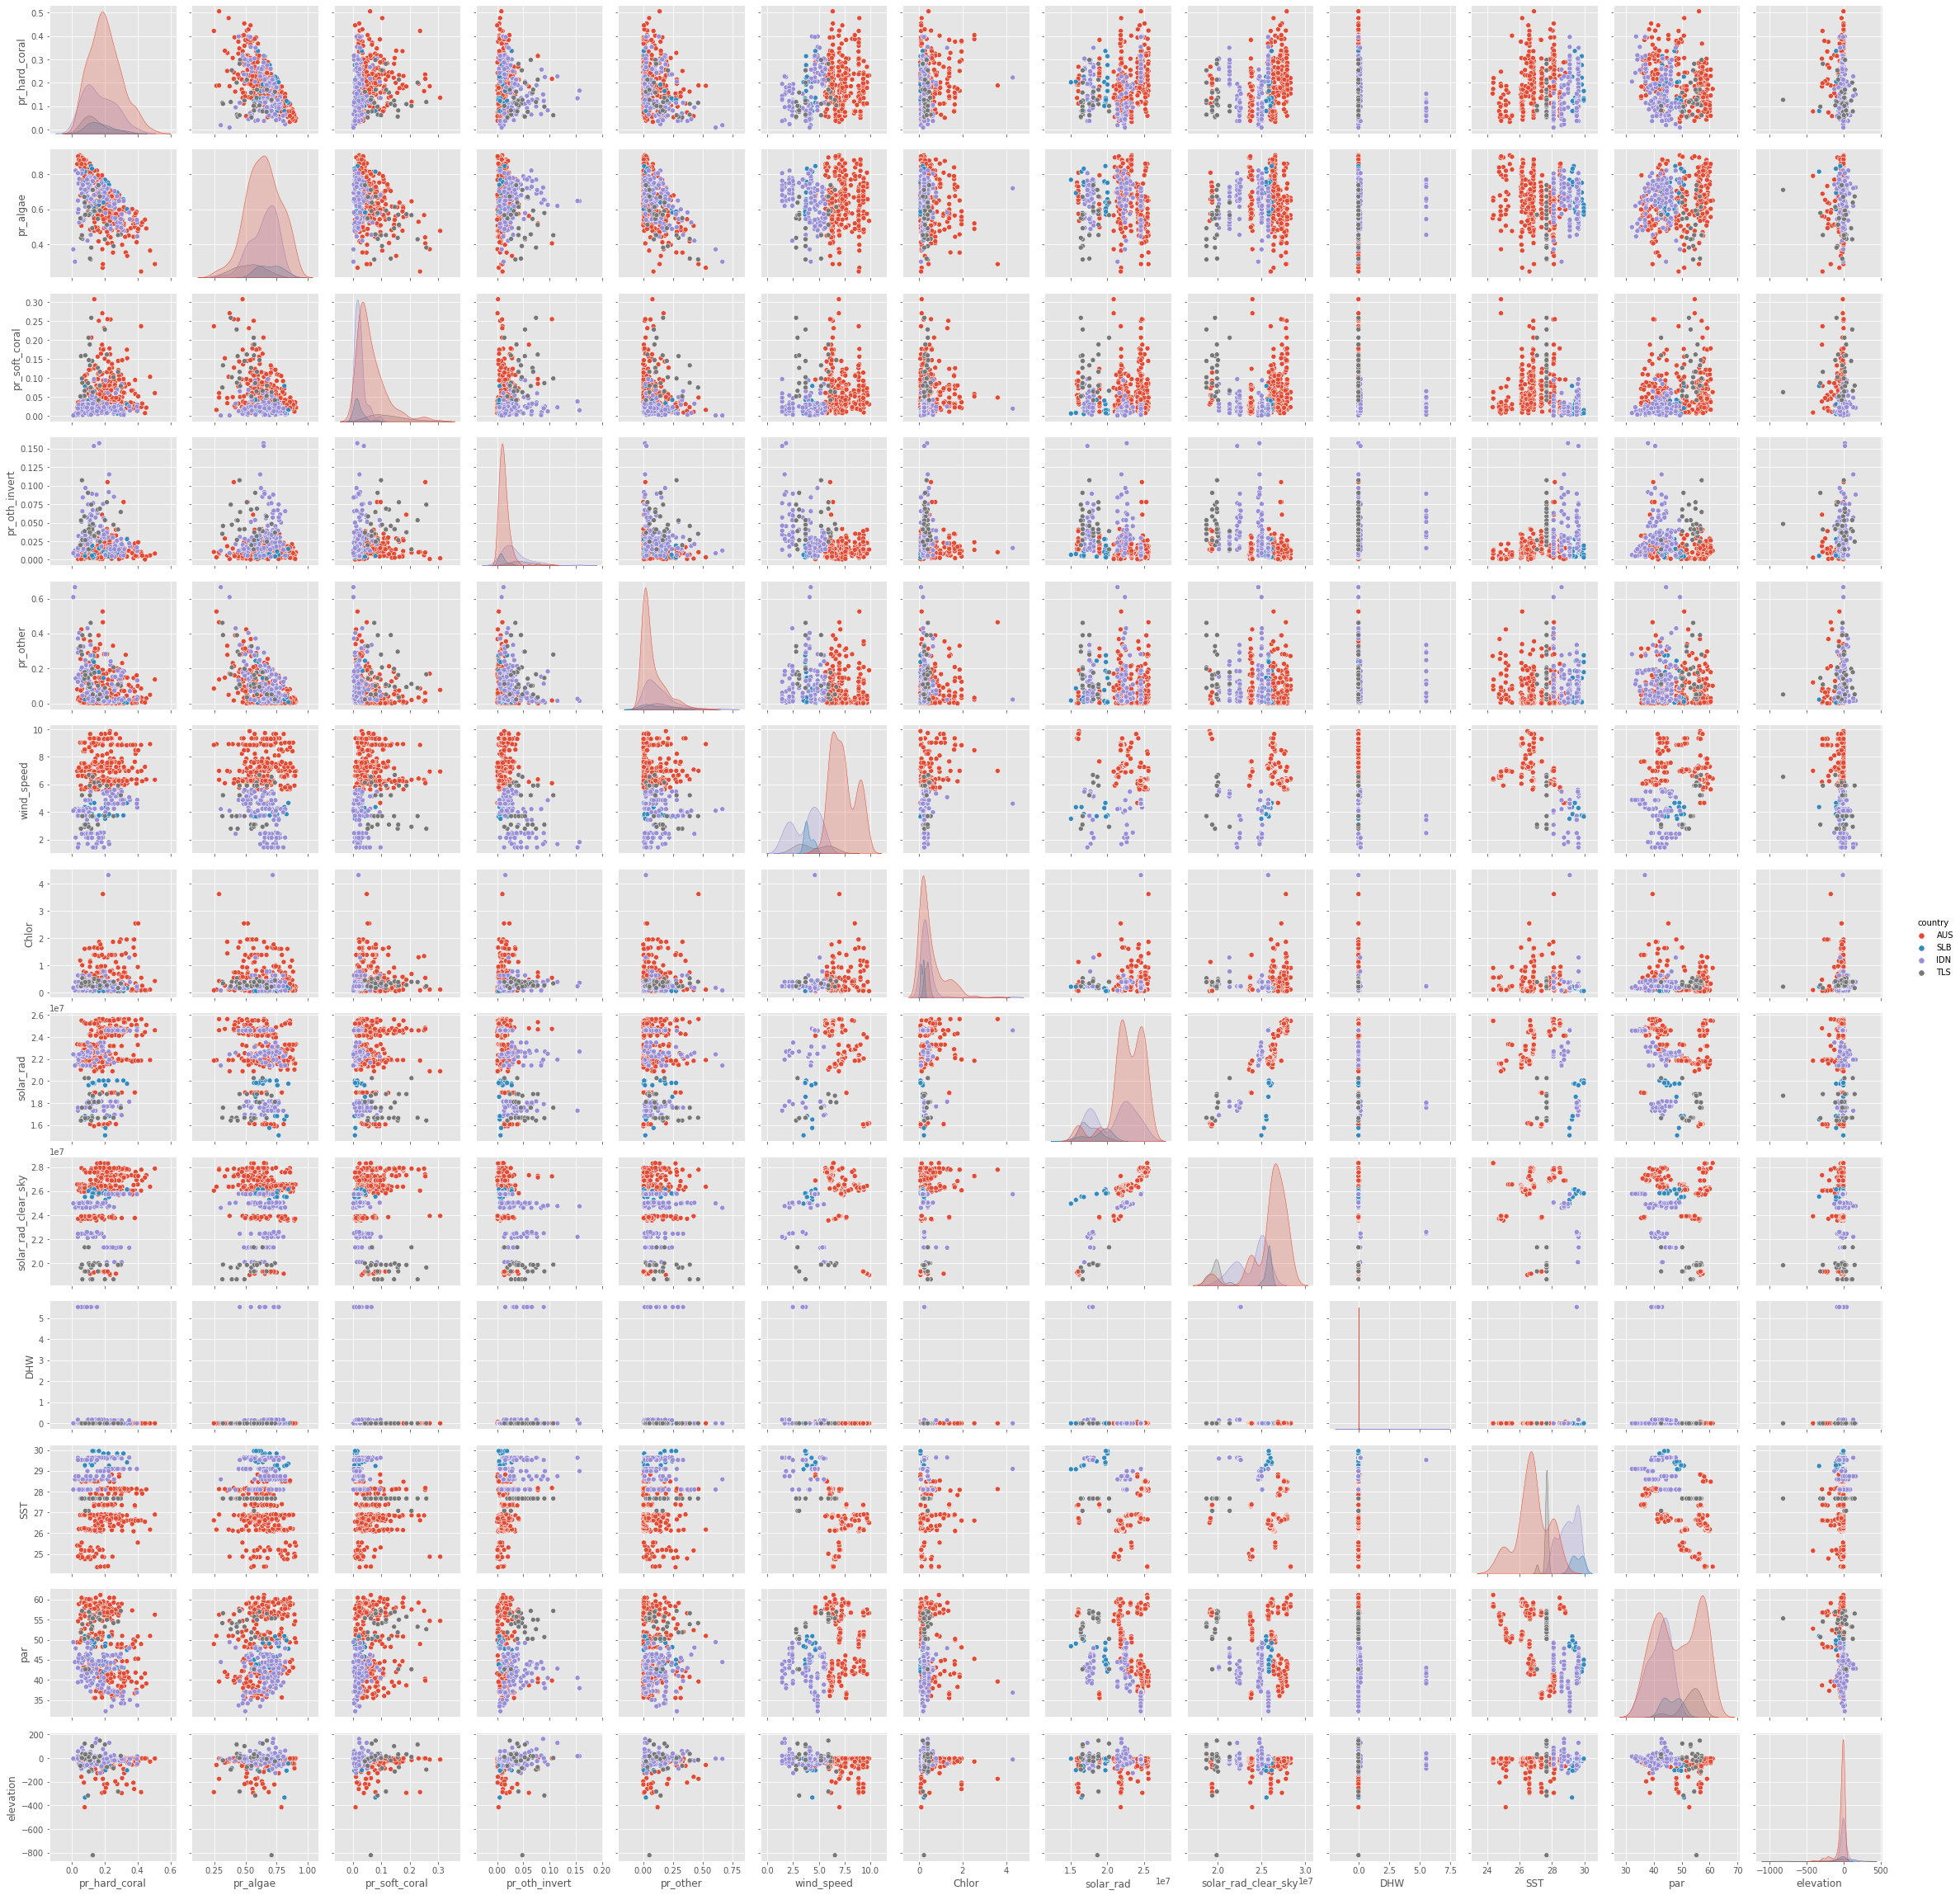

In [105]:
plt.style.use('ggplot') # use ggplot style
sns.pairplot(df_data_env.drop(columns = ['geometry', 'year']), hue = "country")

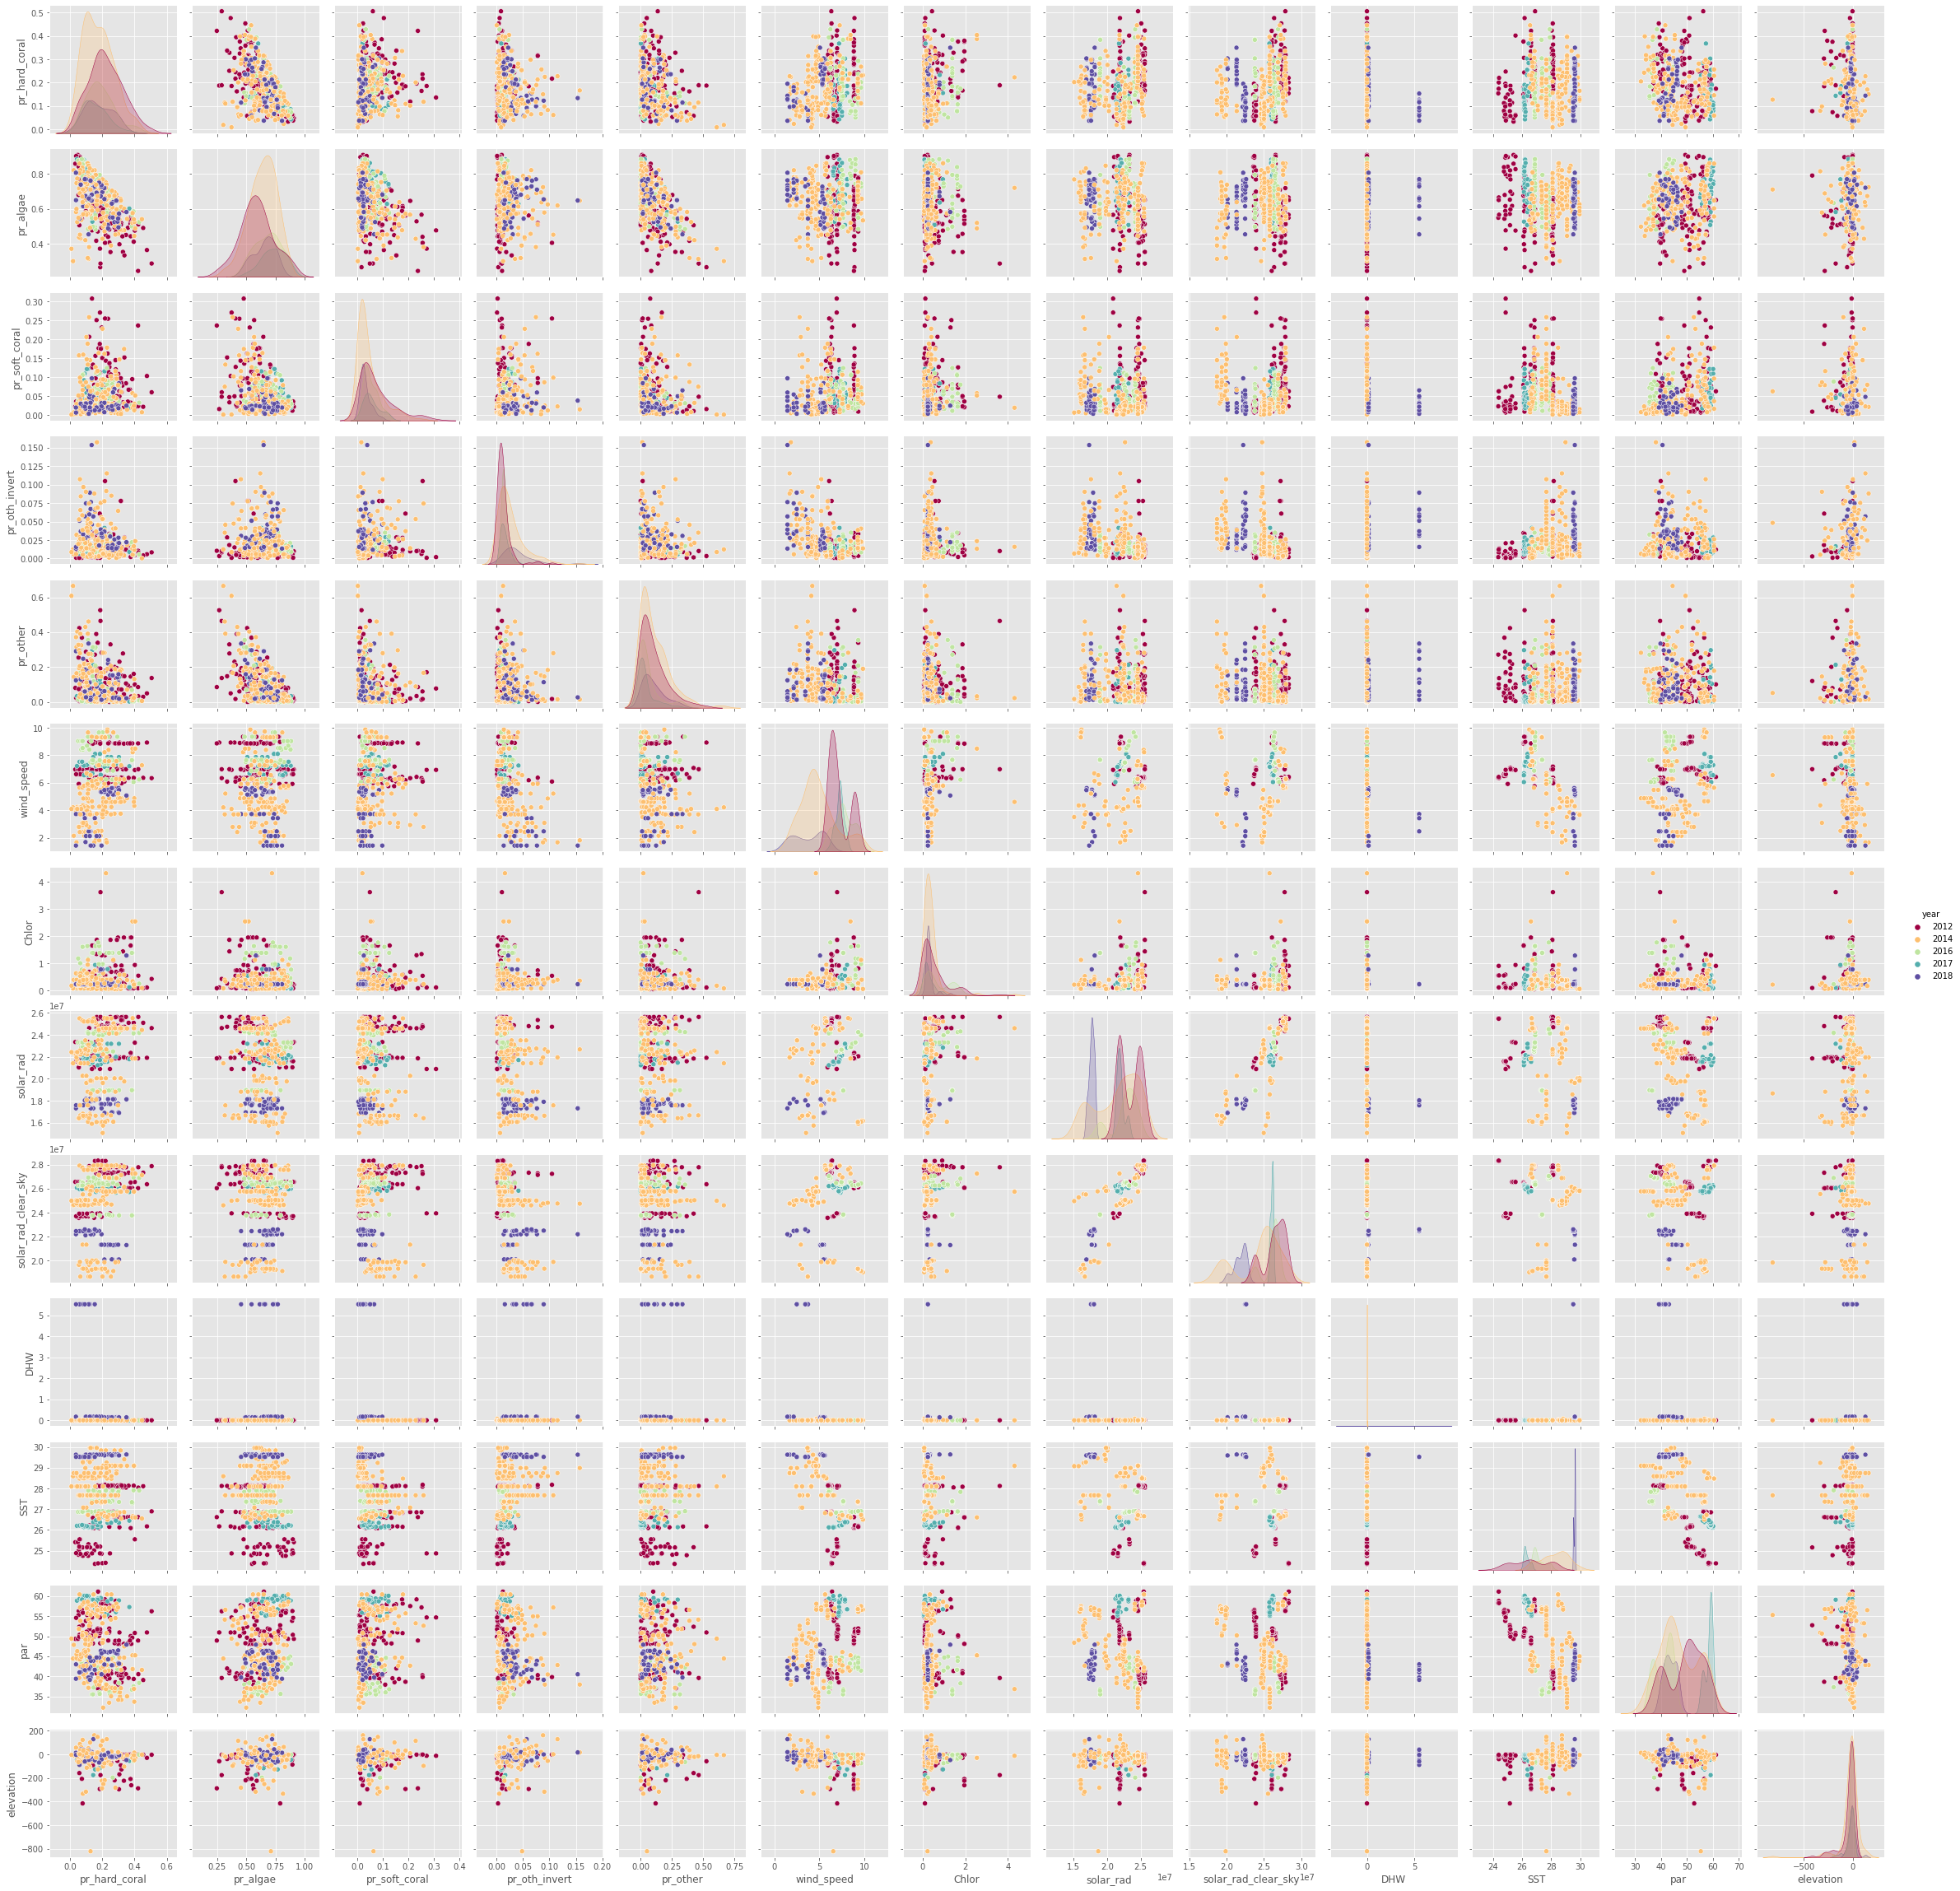

In [106]:
 plt.style.use('ggplot') # use ggplot style
sns.pairplot(df_data_env.drop(columns = ['geometry', 'country']), hue = "year", palette = "Spectral")

## Separated by year

In [107]:
df_data_env12 = df_data_env[df_data_env["year"] == 2012]
df_data_env14 = df_data_env[df_data_env["year"] == 2014]
df_data_env16 = df_data_env[df_data_env["year"] == 2016]
df_data_env17 = df_data_env[df_data_env["year"] == 2017]
df_data_env18 = df_data_env[df_data_env["year"] == 2018]


Text(0.5, 1.0, 'Diagonal Correlation HeatMap for 2012 (only AUS)')

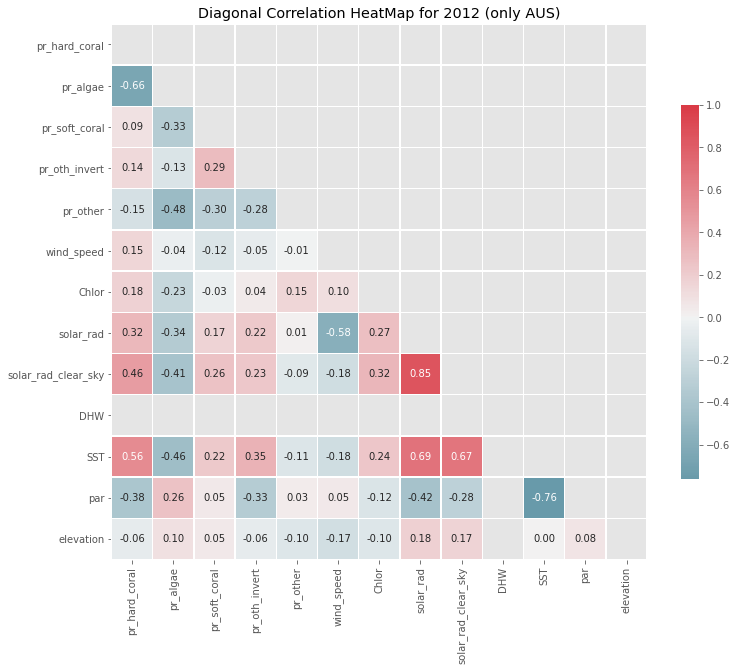

In [108]:
f, ax = plt.subplots(figsize=(12, 12))
corr = df_data_env12.drop(columns = ['year','country', 'geometry']).corr()
 
# TO display diagonal matrix instead of full matrix.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
# Generate a custom diverging colormap.
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio.
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',\
square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
plt.subplots_adjust(top=0.99)
plt.title("Diagonal Correlation HeatMap for 2012 (only AUS)")

**Take-aways**
Hard corals have:
- Negative corr with algae (normal)
- Positive corr with solar rad and surface temperature (strange)
- Negative corr with PAR (normal)

Text(0.5, 1.0, 'Diagonal Correlation HeatMap for 2014 (all countries)')

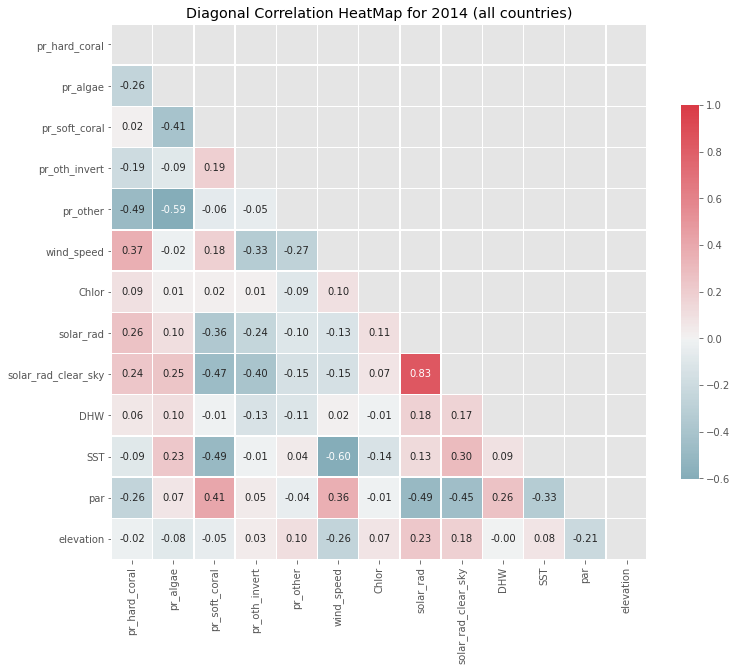

In [109]:
f, ax = plt.subplots(figsize=(12, 12))
corr = df_data_env14.drop(columns = ['year','country', 'geometry']).corr()
 
# TO display diagonal matrix instead of full matrix.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
# Generate a custom diverging colormap.
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio.
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',\
square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
plt.subplots_adjust(top=0.99)
plt.title("Diagonal Correlation HeatMap for 2014 (all countries)")

**Take-aways**
- Positive corr with wind speed (normal)


Text(0.5, 1.0, 'Diagonal Correlation HeatMap for 2016 (only AUS)')

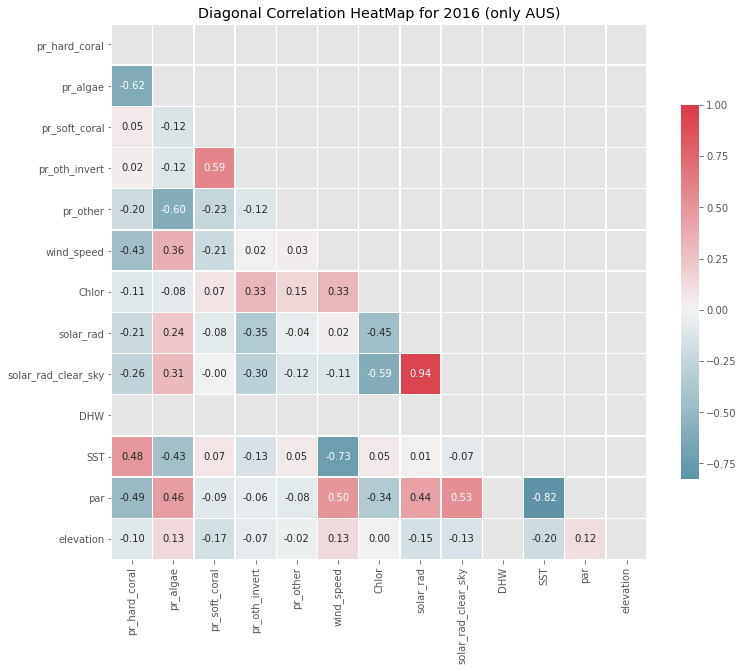

In [110]:
f, ax = plt.subplots(figsize=(12, 12))
corr = df_data_env16.drop(columns = ['year','country', 'geometry']).corr()
 
# TO display diagonal matrix instead of full matrix.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
# Generate a custom diverging colormap.
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio.
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',\
square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
plt.subplots_adjust(top=0.99)
plt.title("Diagonal Correlation HeatMap for 2016 (only AUS)")

**Take-aways**
Hard corals have:
- Negative corr with wind speed (strange)
- Positive corr with SST (strange)
- Negative corr with PAR (normal)

Text(0.5, 1.0, 'Diagonal Correlation HeatMap for 2017 (only AUS)')

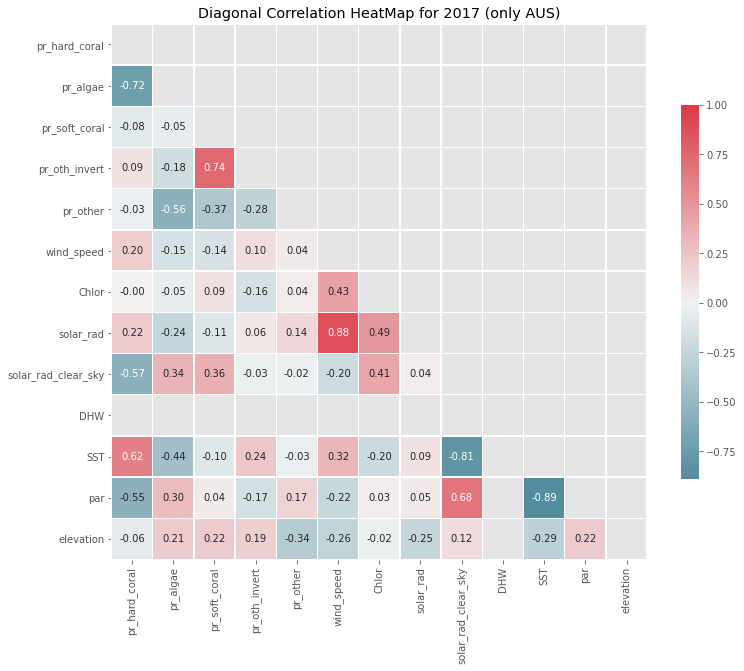

In [111]:
f, ax = plt.subplots(figsize=(12, 12))
corr = df_data_env17.drop(columns = ['year','country', 'geometry']).corr()
 
# TO display diagonal matrix instead of full matrix.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
# Generate a custom diverging colormap.
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio.
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',\
square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
plt.subplots_adjust(top=0.99)
plt.title("Diagonal Correlation HeatMap for 2017 (only AUS)")

**Take-aways**
hard corals have:
- negative corr with solar rad (normal)
- positive corr with SST (strange)
- negative corr with PAR (normal)

Text(0.5, 1.0, 'Diagonal Correlation HeatMap for 2018 (only IDN)')

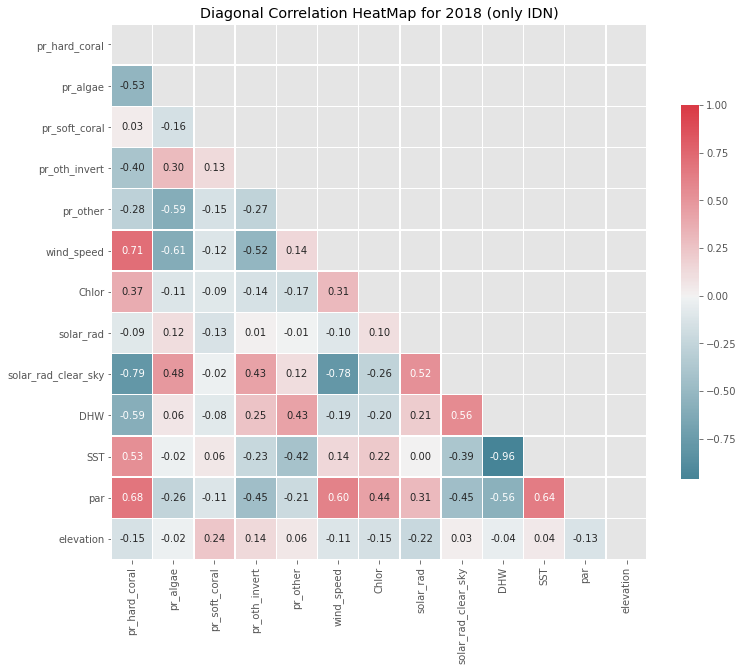

In [112]:
f, ax = plt.subplots(figsize=(12, 12))
corr = df_data_env18.drop(columns = ['year','country', 'geometry']).corr()
 
# TO display diagonal matrix instead of full matrix.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
# Generate a custom diverging colormap.
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio.
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',\
square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
plt.subplots_adjust(top=0.99)
plt.title("Diagonal Correlation HeatMap for 2018 (only IDN)")

**Take-aways**
Hard corals:
- positive corr with wind speed (normal)
- negative corr with DHW/Solar (normal)
- Positive corr with SST/PAR (strange)

### Separated by Country

In [113]:
df_data_envAUS = df_data_env[df_data_env["country"] == "AUS"]
df_data_envIDN = df_data_env[df_data_env["country"] == "IDN"]
df_data_envTLS = df_data_env[df_data_env["country"] == "TLS"]
df_data_envSLB = df_data_env[df_data_env["country"] == "SLB"]

Text(0.5, 1.0, 'Diagonal Correlation HeatMap for Solomon')

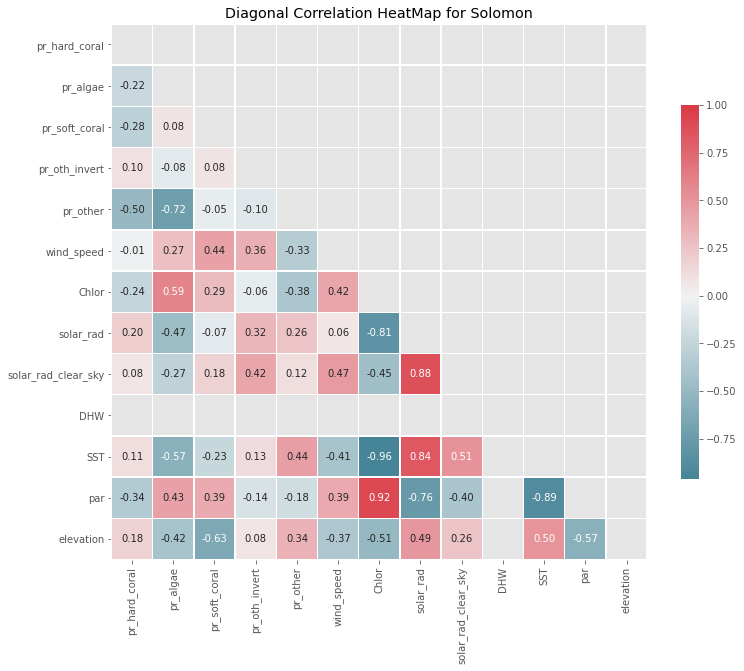

In [114]:
f, ax = plt.subplots(figsize=(12, 12))
corr = df_data_envSLB.drop(columns = ['year','country', 'geometry']).corr()
 
# TO display diagonal matrix instead of full matrix.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
# Generate a custom diverging colormap.
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio.
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',\
square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
plt.subplots_adjust(top=0.99)
plt.title("Diagonal Correlation HeatMap for Solomon")

**Take-aways**
Hard corals:
- Negative corr with PAR (normal)


Text(0.5, 1.0, 'Diagonal Correlation HeatMap for Timor Leste')

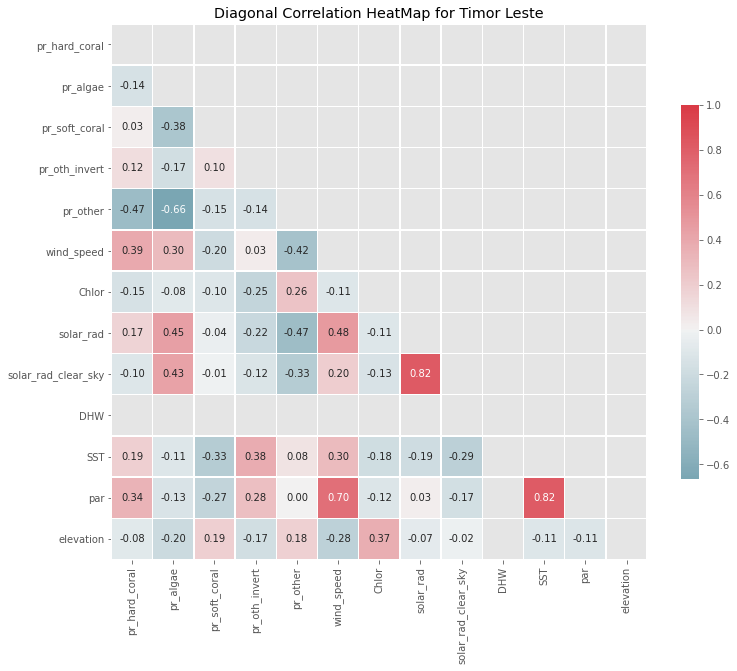

In [115]:
f, ax = plt.subplots(figsize=(12, 12))
corr = df_data_envTLS.drop(columns = ['year','country', 'geometry']).corr()
 
# TO display diagonal matrix instead of full matrix.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
# Generate a custom diverging colormap.
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio.
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',\
square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
plt.subplots_adjust(top=0.99)
plt.title("Diagonal Correlation HeatMap for Timor Leste")

**Take-aways**

Hard corals have:
- Positive corr with wind speed (normal)
- Positive corr with PAR (strange)

Text(0.5, 1.0, 'Diagonal Correlation HeatMap for Australia')

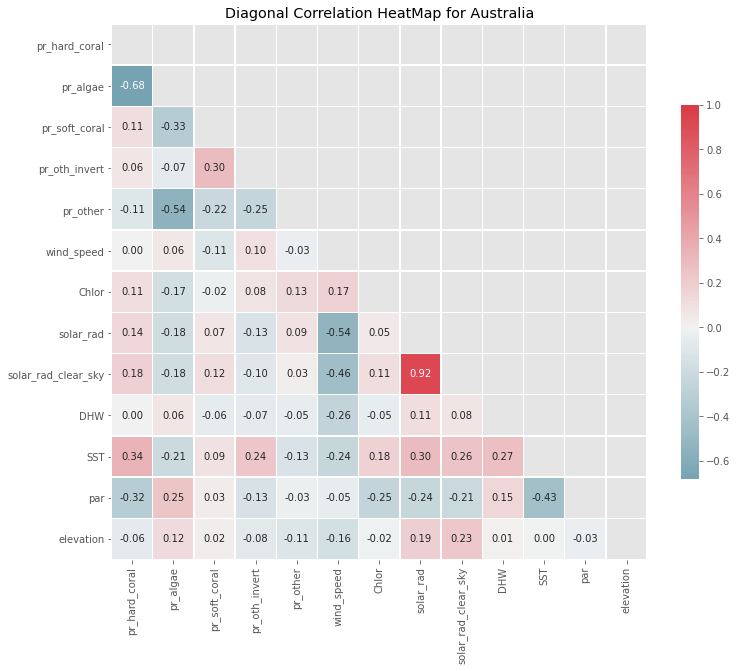

In [116]:
f, ax = plt.subplots(figsize=(12, 12))
corr = df_data_envAUS.drop(columns = ['year','country', 'geometry']).corr()
 
# TO display diagonal matrix instead of full matrix.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
# Generate a custom diverging colormap.
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio.
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',\
square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
plt.subplots_adjust(top=0.99)
plt.title("Diagonal Correlation HeatMap for Australia")

**Take-aways**

Hard corals:
- Positive corr with SST (strange)
- Negative corr with PAR (normal)

Text(0.5, 1.0, 'Diagonal Correlation HeatMap for Indonesia')

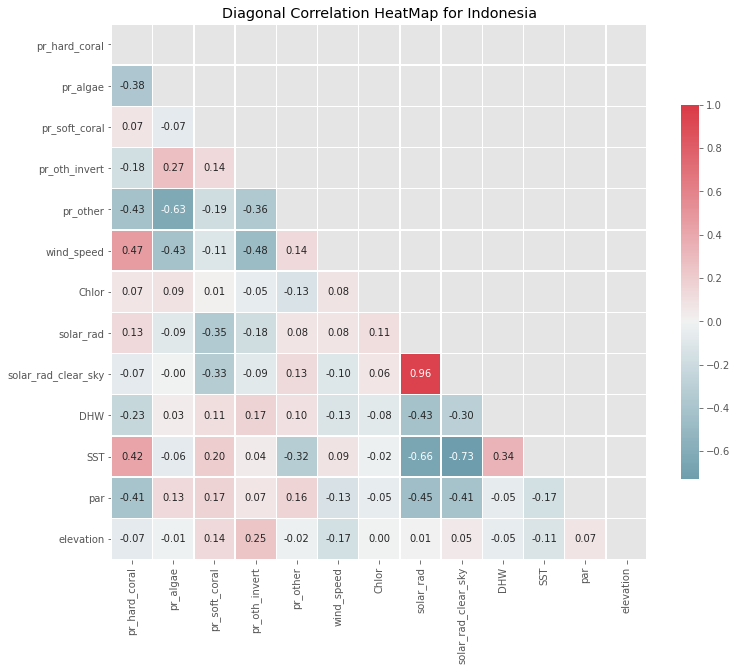

In [117]:
f, ax = plt.subplots(figsize=(12, 12))
corr = df_data_envIDN.drop(columns = ['year','country', 'geometry']).corr()
 
# TO display diagonal matrix instead of full matrix.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
 
# Generate a custom diverging colormap.
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio.
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True, fmt='.2f',\
square=True, linewidths=.5, cbar_kws={"shrink": .5})
 
plt.subplots_adjust(top=0.99)
plt.title("Diagonal Correlation HeatMap for Indonesia")

**Take-aways**

Hard corals have:
- Positive corr with wind speed